# Requirements

In [311]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor

In [ ]:
# Add as many imports as you need.

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for the Amazon stock. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- open - the open price of the stock
- high - the high price of the stock
- low - the low price of the stock
- volume - the volume trades
- close - the close price of the stock

Target:
close

Load the dataset into a `pandas` data frame.

In [353]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('datasets/amazon_stock_price.csv')

In [235]:
df

,date,open,high,low,close,volume
0,1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1,1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
2,1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
3,1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
4,1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
...,...,...,...,...,...,...
6680,2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000
6681,2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600
6682,2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200
6683,2023-12-05,143.5500,148.5700,143.1300,146.8800,46822400


Explore the dataset using visualizations of your choice.

<Figure size 1000x1200 with 0 Axes>

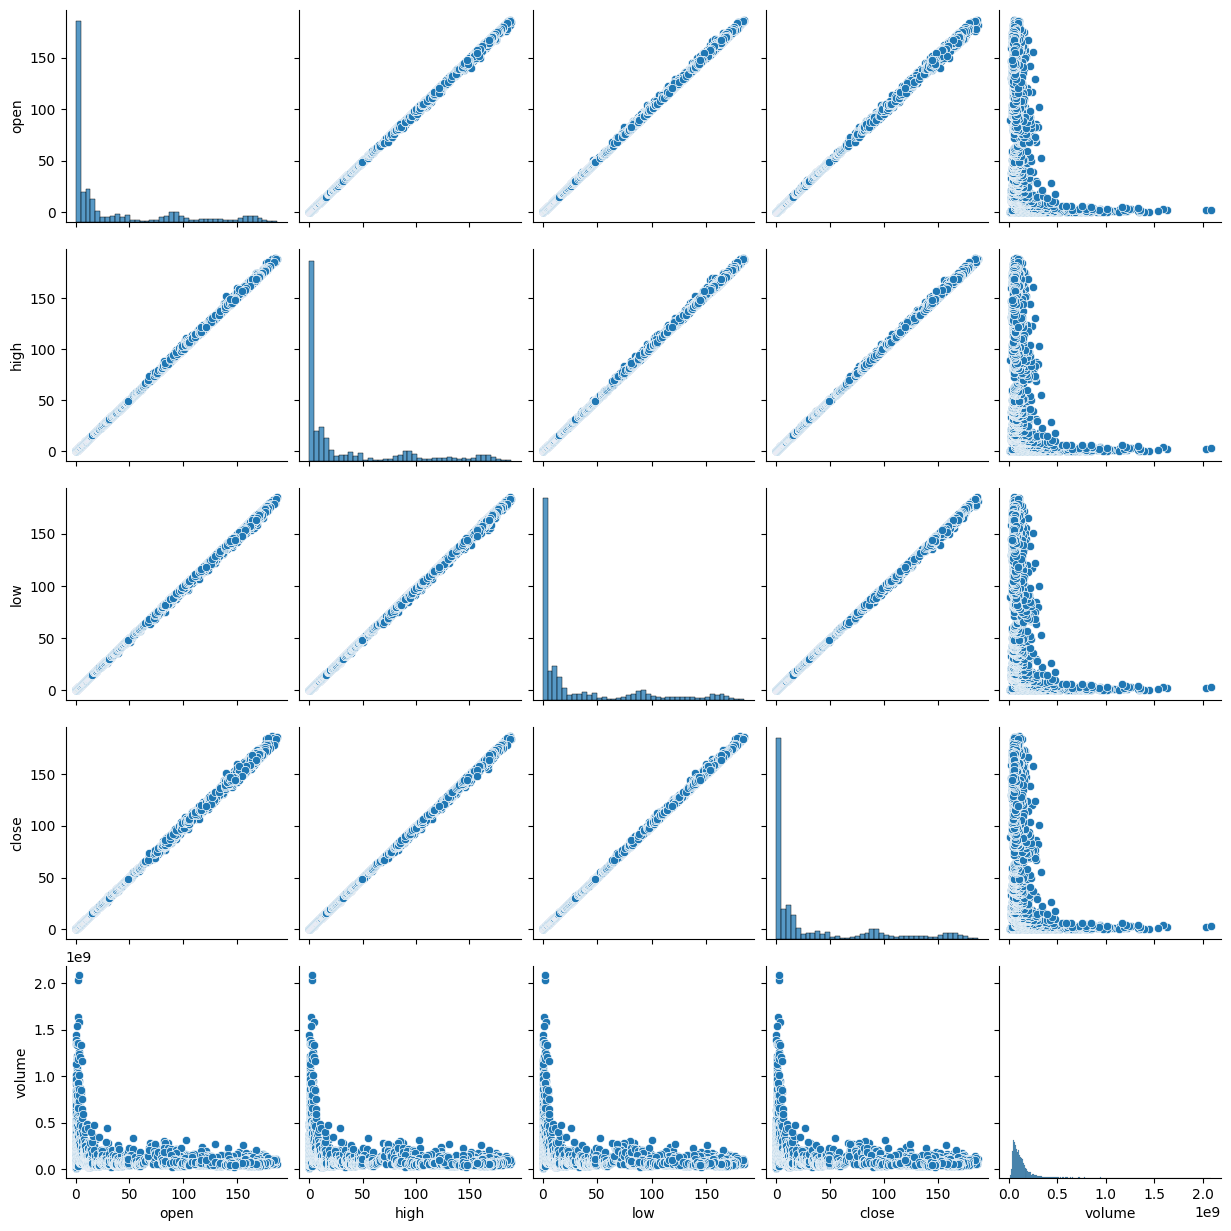

In [7]:
# Write your code here. Add as many boxes as you need. 
plt.figure(figsize=(10,12))
sns.pairplot(df)
plt.show()

In [357]:
df['date'] = pd.to_datetime(df['date'])

In [359]:
df.set_index(keys = 'date', inplace=True)

<Axes: >

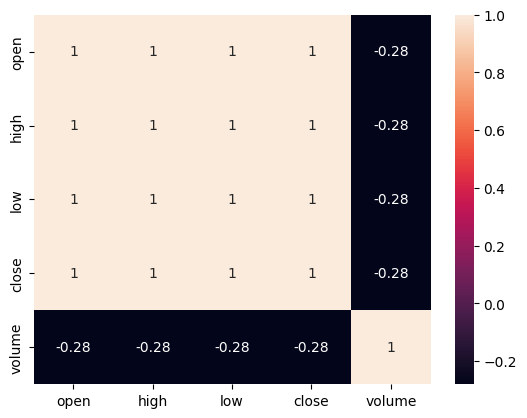

In [361]:
sns.heatmap(df.corr(), annot=True)

In [15]:
df

,open,high,low,close,volume
date,,,,,
1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000
1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000
1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000
1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000
1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000
...,...,...,...,...,...
2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000
2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600
2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200


# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [329]:
# Write your code here. Add as many boxes as you need.
features = [col for col in df.columns if col not in 'date']
features

['open', 'high', 'low', 'close', 'volume']

In [255]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [241]:
# df = df[['close']].copy()
# df

In [331]:
# Write your code here. Add as many boxes as you need.

#1 opcija 
# for lag in range(7,0,-1):
#         df[f'Close_lag{lag}'] = df['close'].shift(lag)

# 2 opcija 
for lag in range(7,0,-1):
    for col in features:
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)

In [259]:
df

,open,high,low,close,volume,open_lag_7,high_lag_7,low_lag_7,close_lag_7,volume_lag_7,...,open_lag_2,high_lag_2,low_lag_2,close_lag_2,volume_lag_2,open_lag_1,high_lag_1,low_lag_1,close_lag_1,volume_lag_1
date,,,,,,,,,,,,,,,,,,,,,
1997-05-15,0.1219,0.1250,0.0964,0.0979,1443120000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.0984,0.0990,0.0854,0.0865,294000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.1219,0.1250,0.0964,0.0979,1.443120e+09
1997-05-19,0.0880,0.0885,0.0812,0.0854,122136000,NaN,NaN,NaN,NaN,NaN,...,0.1219,0.1250,0.0964,0.0979,1.443120e+09,0.0984,0.0990,0.0854,0.0865,2.940000e+08
1997-05-20,0.0865,0.0875,0.0818,0.0818,109344000,NaN,NaN,NaN,NaN,NaN,...,0.0984,0.0990,0.0854,0.0865,2.940000e+08,0.0880,0.0885,0.0812,0.0854,1.221360e+08
1997-05-21,0.0818,0.0823,0.0688,0.0714,377064000,NaN,NaN,NaN,NaN,NaN,...,0.0880,0.0885,0.0812,0.0854,1.221360e+08,0.0865,0.0875,0.0818,0.0818,1.093440e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,144.7600,146.9300,144.3300,146.0900,65814000,145.13,146.63,144.73,146.13,41951200.0,...,146.9800,147.6000,145.5300,147.0300,4.271170e+07,147.8500,148.5400,145.9700,146.3200,4.061090e+07
2023-12-01,146.0000,147.2500,145.5500,147.0300,39924600,143.91,144.05,141.50,143.90,71226000.0,...,147.8500,148.5400,145.9700,146.3200,4.061090e+07,144.7600,146.9300,144.3300,146.0900,6.581400e+07
2023-12-04,145.2500,145.3500,142.8100,144.8400,48294200,144.57,147.74,144.57,146.71,45669100.0,...,144.7600,146.9300,144.3300,146.0900,6.581400e+07,146.0000,147.2500,145.5500,147.0300,3.992460e+07


In [261]:
df.isnull().sum()

open            0
high            0
low             0
close           0
volume          0
open_lag_7      7
high_lag_7      7
low_lag_7       7
close_lag_7     7
volume_lag_7    7
open_lag_6      6
high_lag_6      6
low_lag_6       6
close_lag_6     6
volume_lag_6    6
open_lag_5      5
high_lag_5      5
low_lag_5       5
close_lag_5     5
volume_lag_5    5
open_lag_4      4
high_lag_4      4
low_lag_4       4
close_lag_4     4
volume_lag_4    4
open_lag_3      3
high_lag_3      3
low_lag_3       3
close_lag_3     3
volume_lag_3    3
open_lag_2      2
high_lag_2      2
low_lag_2       2
close_lag_2     2
volume_lag_2    2
open_lag_1      1
high_lag_1      1
low_lag_1       1
close_lag_1     1
volume_lag_1    1
dtype: int64

In [333]:
df = df.dropna().reset_index(drop=True)

In [265]:
df

,open,high,low,close,volume,open_lag_7,high_lag_7,low_lag_7,close_lag_7,volume_lag_7,...,open_lag_2,high_lag_2,low_lag_2,close_lag_2,volume_lag_2,open_lag_1,high_lag_1,low_lag_1,close_lag_1,volume_lag_1
0,0.0755,0.0823,0.0729,0.0792,173952000,0.1219,0.1250,0.0964,0.0979,1.443120e+09,...,0.0719,0.0724,0.0656,0.0698,235536000.0,0.0703,0.0760,0.0667,0.0750,318744000.0
1,0.0812,0.0818,0.0766,0.0766,91488000,0.0984,0.0990,0.0854,0.0865,2.940000e+08,...,0.0703,0.0760,0.0667,0.0750,318744000.0,0.0755,0.0823,0.0729,0.0792,173952000.0
2,0.0771,0.0771,0.0740,0.0753,69456000,0.0880,0.0885,0.0812,0.0854,1.221360e+08,...,0.0755,0.0823,0.0729,0.0792,173952000.0,0.0812,0.0818,0.0766,0.0766,91488000.0
3,0.0750,0.0755,0.0740,0.0750,51888000,0.0865,0.0875,0.0818,0.0818,1.093440e+08,...,0.0812,0.0818,0.0766,0.0766,91488000.0,0.0771,0.0771,0.0740,0.0753,69456000.0
4,0.0755,0.0766,0.0750,0.0755,11832000,0.0818,0.0823,0.0688,0.0714,3.770640e+08,...,0.0771,0.0771,0.0740,0.0753,69456000.0,0.0750,0.0755,0.0740,0.0750,51888000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6673,144.7600,146.9300,144.3300,146.0900,65814000,145.1300,146.6300,144.7300,146.1300,4.195120e+07,...,146.9800,147.6000,145.5300,147.0300,42711700.0,147.8500,148.5400,145.9700,146.3200,40610900.0
6674,146.0000,147.2500,145.5500,147.0300,39924600,143.9100,144.0500,141.5000,143.9000,7.122600e+07,...,147.8500,148.5400,145.9700,146.3200,40610900.0,144.7600,146.9300,144.3300,146.0900,65814000.0
6675,145.2500,145.3500,142.8100,144.8400,48294200,144.5700,147.7400,144.5700,146.7100,4.566910e+07,...,144.7600,146.9300,144.3300,146.0900,65814000.0,146.0000,147.2500,145.5500,147.0300,39924600.0
6676,143.5500,148.5700,143.1300,146.8800,46822400,146.7000,147.2000,145.3200,146.7400,2.237840e+07,...,146.0000,147.2500,145.5500,147.0300,39924600.0,145.2500,145.3500,142.8100,144.8400,48294200.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [335]:
features2 = [col for col in df.columns if col not in ['open', 'high', 'low', 'volume', 'close']] #samo close tuka
features2
#probaj samo so features - potocno samo so close_lag ...

['open_lag_7',
 'high_lag_7',
 'low_lag_7',
 'close_lag_7',
 'volume_lag_7',
 'open_lag_6',
 'high_lag_6',
 'low_lag_6',
 'close_lag_6',
 'volume_lag_6',
 'open_lag_5',
 'high_lag_5',
 'low_lag_5',
 'close_lag_5',
 'volume_lag_5',
 'open_lag_4',
 'high_lag_4',
 'low_lag_4',
 'close_lag_4',
 'volume_lag_4',
 'open_lag_3',
 'high_lag_3',
 'low_lag_3',
 'close_lag_3',
 'volume_lag_3',
 'open_lag_2',
 'high_lag_2',
 'low_lag_2',
 'close_lag_2',
 'volume_lag_2',
 'open_lag_1',
 'high_lag_1',
 'low_lag_1',
 'close_lag_1',
 'volume_lag_1']

In [337]:
x = df[features2]
y = df['close']

In [275]:
x

,open_lag_7,high_lag_7,low_lag_7,close_lag_7,volume_lag_7,open_lag_6,high_lag_6,low_lag_6,close_lag_6,volume_lag_6,...,open_lag_2,high_lag_2,low_lag_2,close_lag_2,volume_lag_2,open_lag_1,high_lag_1,low_lag_1,close_lag_1,volume_lag_1
0,0.1219,0.1250,0.0964,0.0979,1.443120e+09,0.0984,0.0990,0.0854,0.0865,294000000.0,...,0.0719,0.0724,0.0656,0.0698,235536000.0,0.0703,0.0760,0.0667,0.0750,318744000.0
1,0.0984,0.0990,0.0854,0.0865,2.940000e+08,0.0880,0.0885,0.0812,0.0854,122136000.0,...,0.0703,0.0760,0.0667,0.0750,318744000.0,0.0755,0.0823,0.0729,0.0792,173952000.0
2,0.0880,0.0885,0.0812,0.0854,1.221360e+08,0.0865,0.0875,0.0818,0.0818,109344000.0,...,0.0755,0.0823,0.0729,0.0792,173952000.0,0.0812,0.0818,0.0766,0.0766,91488000.0
3,0.0865,0.0875,0.0818,0.0818,1.093440e+08,0.0818,0.0823,0.0688,0.0714,377064000.0,...,0.0812,0.0818,0.0766,0.0766,91488000.0,0.0771,0.0771,0.0740,0.0753,69456000.0
4,0.0818,0.0823,0.0688,0.0714,3.770640e+08,0.0719,0.0724,0.0656,0.0698,235536000.0,...,0.0771,0.0771,0.0740,0.0753,69456000.0,0.0750,0.0755,0.0740,0.0750,51888000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6673,145.1300,146.6300,144.7300,146.1300,4.195120e+07,143.9100,144.0500,141.5000,143.9000,71226000.0,...,146.9800,147.6000,145.5300,147.0300,42711700.0,147.8500,148.5400,145.9700,146.3200,40610900.0
6674,143.9100,144.0500,141.5000,143.9000,7.122600e+07,144.5700,147.7400,144.5700,146.7100,45669100.0,...,147.8500,148.5400,145.9700,146.3200,40610900.0,144.7600,146.9300,144.3300,146.0900,65814000.0
6675,144.5700,147.7400,144.5700,146.7100,4.566910e+07,146.7000,147.2000,145.3200,146.7400,22378400.0,...,144.7600,146.9300,144.3300,146.0900,65814000.0,146.0000,147.2500,145.5500,147.0300,39924600.0
6676,146.7000,147.2000,145.3200,146.7400,2.237840e+07,147.5300,149.2600,146.8800,147.7300,53762400.0,...,146.0000,147.2500,145.5500,147.0300,39924600.0,145.2500,145.3500,142.8100,144.8400,48294200.0


In [277]:
y

0         0.0792
1         0.0766
2         0.0753
3         0.0750
4         0.0755
          ...   
6673    146.0900
6674    147.0300
6675    144.8400
6676    146.8800
6677    144.5200
Name: close, Length: 6678, dtype: float64

In [339]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [341]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
#y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [343]:
# Write your code here. Add as many boxes as you need.
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Use the trained model to make predictions for the test set.

In [345]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(x_test)

In [287]:
y_pred = np.array(y_pred)

# Reshape y_pred to a 2D array with one column
y_pred = y_pred.reshape(-1, 1)

# Inverse transform the predictions
y_pred = scaler.inverse_transform(y_pred)

In [347]:
y_pred

array([94.923995, 94.7913  , 94.690635, ..., 95.12581 , 95.12581 ,
       95.12581 ])

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [349]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-0.8389609682659507
1870.9886635944713


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [313]:
# Write your code here. Add as many boxes as you need.
model2 = XGBRegressor(n_estimators=100, random_state = 42)

model2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Use the trained model to make predictions for the test set.

In [319]:
# Write your code here. Add as many boxes as you need.
y_pred = model2.predict(x_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [321]:
# Write your code here. Add as many boxes as you need.
r2_score(y_test, y_pred)

-0.9484593982378771